<a href="https://colab.research.google.com/github/eshreyareddy/CRISP-DM-SEMMA-KDD/blob/main/KDD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
from google.colab import files

uploaded = files.upload()

Saving News_Category_Dataset_v3.json to News_Category_Dataset_v3.json


In [3]:
import pandas as pd

# Trying to load the "News_Category_Dataset_v3.json" dataset again
try:
    news_category_df = pd.read_json("News_Category_Dataset_v3.json", lines=True)
    display = True, news_category_df.head()
except Exception as e:
    display = False, str(e)

display


(True,
                                                 link  \
 0  https://www.huffpost.com/entry/covid-boosters-...   
 1  https://www.huffpost.com/entry/american-airlin...   
 2  https://www.huffpost.com/entry/funniest-tweets...   
 3  https://www.huffpost.com/entry/funniest-parent...   
 4  https://www.huffpost.com/entry/amy-cooper-lose...   
 
                                             headline   category  \
 0  Over 4 Million Americans Roll Up Sleeves For O...  U.S. NEWS   
 1  American Airlines Flyer Charged, Banned For Li...  U.S. NEWS   
 2  23 Of The Funniest Tweets About Cats And Dogs ...     COMEDY   
 3  The Funniest Tweets From Parents This Week (Se...  PARENTING   
 4  Woman Who Called Cops On Black Bird-Watcher Lo...  U.S. NEWS   
 
                                    short_description               authors  \
 0  Health experts said it is too early to predict...  Carla K. Johnson, AP   
 1  He was subdued by passengers and crew when he ...        Mary Papenfuss   
 2

In [4]:
# Checking for missing values in the dataset
missing_values_news = news_category_df.isnull().sum()

# Display missing values
missing_values_news


link                 0
headline             0
category             0
short_description    0
authors              0
date                 0
dtype: int64

In [5]:
# Ensuring text columns are of string type and cleaning the textual data
text_columns = ['headline', 'short_description', 'authors']

for column in text_columns:
    news_category_df[column] = news_category_df[column].astype(str)
    news_category_df[column] = news_category_df[column].str.lower()
    news_category_df[column] = news_category_df[column].str.strip()

# Display the cleaned dataset's first few rows
news_category_df.head()


,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,over 4 million americans roll up sleeves for o...,U.S. NEWS,health experts said it is too early to predict...,"carla k. johnson, ap",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"american airlines flyer charged, banned for li...",U.S. NEWS,he was subdued by passengers and crew when he ...,mary papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 of the funniest tweets about cats and dogs ...,COMEDY,"""until you have a dog you don't understand wha...",elyse wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,the funniest tweets from parents this week (se...,PARENTING,"""accidentally put grown-up toothpaste on my to...",caroline bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,woman who called cops on black bird-watcher lo...,U.S. NEWS,amy cooper accused investment firm franklin te...,nina golgowski,2022-09-22


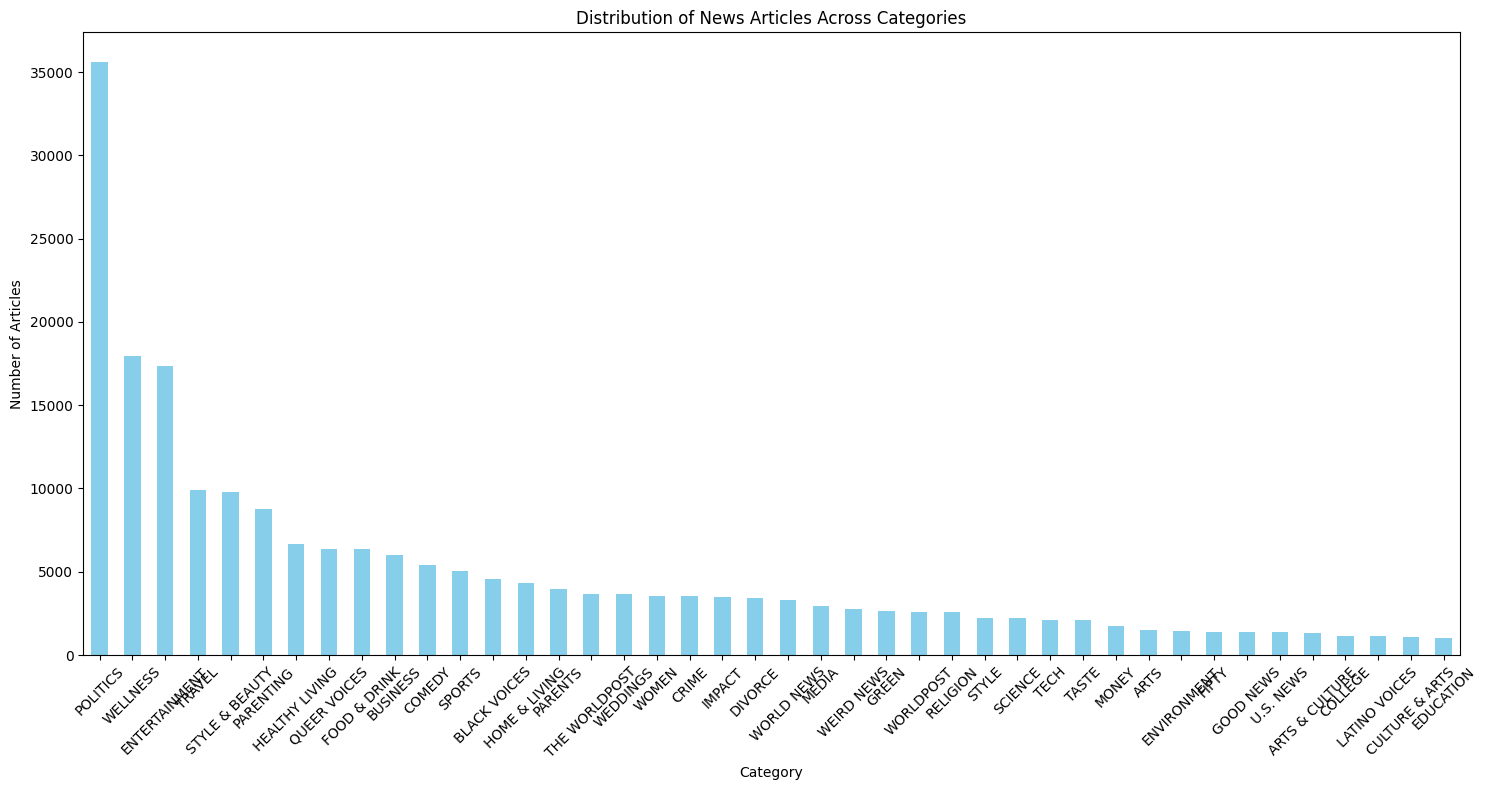

In [6]:
import matplotlib.pyplot as plt

# Distribution of news articles across different categories
category_counts = news_category_df['category'].value_counts()

# Plotting
plt.figure(figsize=(15,8))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of News Articles Across Categories')
plt.ylabel('Number of Articles')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Combining 'headline' and 'short_description' into a single column for transformation
news_category_df['combined_text'] = news_category_df['headline'] + " " + news_category_df['short_description']

# Using TF-IDF to transform the combined textual data
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')  # Limiting to top 5000 features for computational efficiency
tfidf_matrix = tfidf_vectorizer.fit_transform(news_category_df['combined_text'])

# Displaying the shape of the resulting matrix
tfidf_matrix.shape


(209527, 5000)

In [8]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets (80% train, 20% test)
X = tfidf_matrix
y = news_category_df['category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train.shape, X_test.shape


((167621, 5000), (41906, 5000))

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initializing and training the Logistic Regression model
logreg = LogisticRegression(solver='saga', multi_class='multinomial', random_state=42, max_iter=1000)
logreg.fit(X_train, y_train)

# Predicting on the test set
y_pred = logreg.predict(X_test)

# Calculating accuracy and displaying the classification report
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=y.unique())

accuracy, class_report


(0.578890850952131,
 '                precision    recall  f1-score   support\n\n     U.S. NEWS       0.37      0.16      0.22       302\n        COMEDY       0.35      0.13      0.19       268\n     PARENTING       0.46      0.32      0.38       917\n    WORLD NEWS       0.47      0.45      0.46      1198\nCULTURE & ARTS       0.46      0.31      0.37       229\n          TECH       0.56      0.38      0.45      1080\n        SPORTS       0.54      0.52      0.53       712\n ENTERTAINMENT       0.60      0.18      0.28       215\n      POLITICS       0.82      0.64      0.72       685\n    WEIRD NEWS       0.44      0.28      0.34       203\n   ENVIRONMENT       0.53      0.74      0.62      3473\n     EDUCATION       0.58      0.22      0.32       289\n         CRIME       0.47      0.12      0.19       280\n       SCIENCE       0.58      0.69      0.63      1268\n      WELLNESS       0.44      0.14      0.21       280\n      BUSINESS       0.38      0.28      0.32       524\nSTYLE &

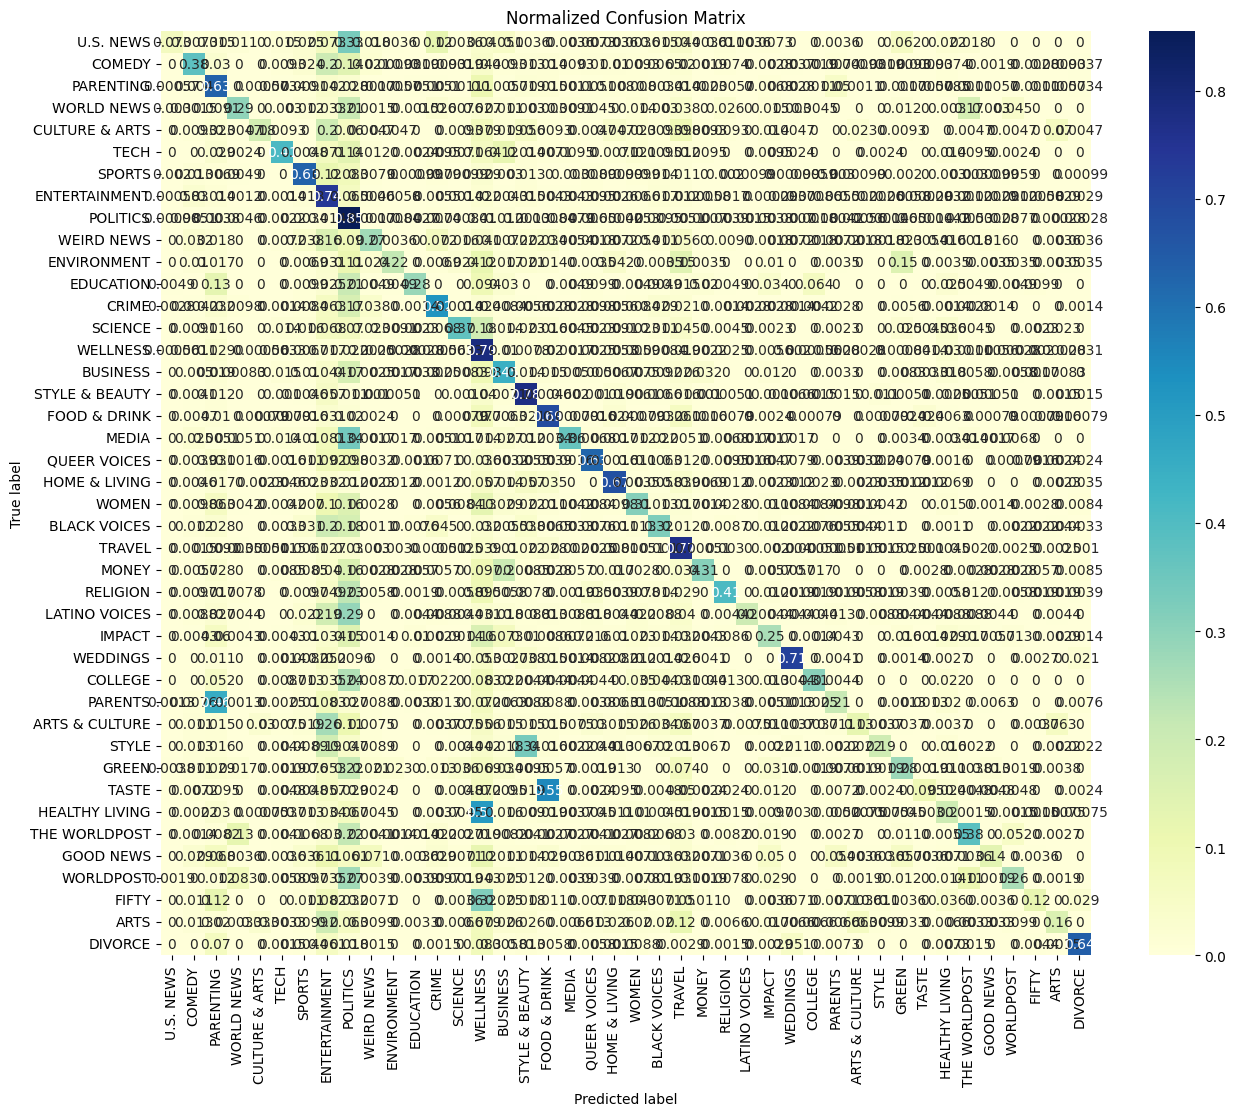

In [11]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=y.unique())
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Plot confusion matrix
plt.figure(figsize=(15, 12))
sns.heatmap(conf_matrix_normalized, annot=True, cmap="YlGnBu", xticklabels=y.unique(), yticklabels=y.unique())
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Normalized Confusion Matrix')
plt.show()


In [12]:
# Getting the feature names (words/terms)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Function to get top features for a given class
def top_features_for_class(class_index, num_features=10):
    # Get the coefficients for the class
    coefficients = logreg.coef_[class_index]
    # Sort them in descending order and get the top features
    top_feature_indices = coefficients.argsort()[::-1][:num_features]
    top_features = [(feature_names[i], coefficients[i]) for i in top_feature_indices]
    return top_features

# Get top features for some categories
categories = y.unique()
top_features_dict = {}
for category in categories:
    class_index = np.where(logreg.classes_ == category)[0][0]
    top_features_dict[category] = top_features_for_class(class_index)

top_features_dict


{'U.S. NEWS': [('said', 5.142412498703177),
  ('covid', 4.9740190893479195),
  ('california', 4.507296124573982),
  ('coronavirus', 4.438486019639791),
  ('shooting', 3.927165369080298),
  ('police', 3.8254759840126766),
  ('border', 3.672286068804089),
  ('biden', 3.5295498282897824),
  ('killed', 3.362856815560911),
  ('officials', 3.260258410544871)],
 'COMEDY': [('snl', 8.957876741840114),
  ('maher', 8.748198645227834),
  ('colbert', 7.6918508297508215),
  ('trump', 6.6282106649338965),
  ('conan', 5.9455791933944),
  ('oliver', 5.825645053526844),
  ('trevor', 5.397191532010614),
  ('meyers', 5.192513627977926),
  ('comedy', 5.0372677603786205),
  ('corden', 4.820383997689484)],
 'PARENTING': [('kids', 8.188606947525125),
  ('parenting', 8.030645535057324),
  ('children', 6.909605613925024),
  ('breastfeeding', 6.7501828737868115),
  ('baby', 6.526389743630469),
  ('parents', 6.355860418176298),
  ('babies', 6.181994783614779),
  ('daughter', 6.040192747372326),
  ('parent', 5.96